In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot


In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
iris = pd.read_csv(r"C:\Users\LENOVO\Desktop\Deep learning projects\machine learning projects\clustering_iris\Iris.csv")

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris["Species"][0:50].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

In [18]:
iris.drop("Id" , axis = 1, inplace=True)

In [19]:
iris.shape

(150, 5)

In [33]:
px.scatter(x="Species", y = "PetalWidthCm",data_frame=iris, size="PetalWidthCm")

In [36]:
px.bar(x="Species", y = "PetalWidthCm",data_frame=iris)

In [41]:
px.scatter_matrix(iris, color="Species", dimensions = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

In [44]:
px.area(iris, x="Species", y="SepalLengthCm")

In [45]:
X=iris.drop(['Species'],axis=1)

In [46]:
y=iris['Species']

In [47]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [48]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Decision Tree

In [72]:
from sklearn import tree

DT=tree.DecisionTreeClassifier(criterion="entropy" ,min_samples_split=3, max_depth=4)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3)

In [73]:
from sklearn.metrics import accuracy_score
prediction_DT=DT.predict(X_test)
accuracy_DT=accuracy_score(y_test,prediction_DT)*100

In [74]:
accuracy_DT

97.77777777777777

In [75]:
import graphviz

vis_data=tree.export_graphviz(DT,out_file=None, feature_names=iris.drop(['Species'],axis=1).keys(),class_names=iris['Species'].unique(),filled=True,rounded=True,special_characters=True)

In [76]:

os.environ["PATH"]+= os.pathsep+(r'C:\Program Files\Graphviz\bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

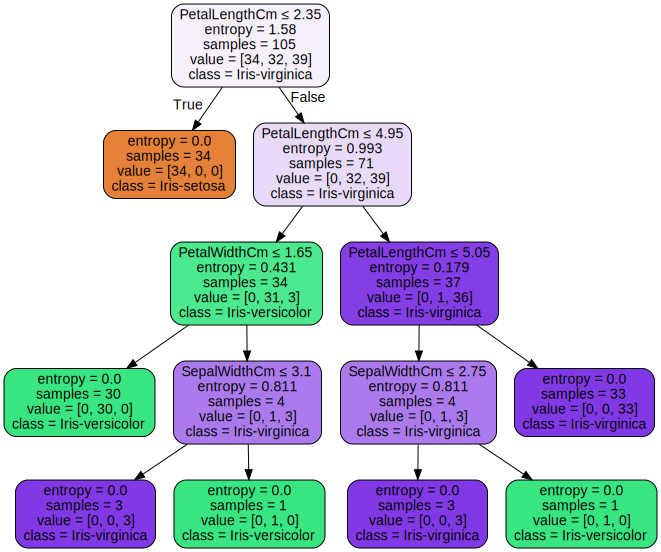

In [77]:
graphviz.Source(vis_data)

In [78]:
from sklearn import tree

DT1=tree.DecisionTreeClassifier()
DT1.fit(X_train,y_train)

DecisionTreeClassifier()

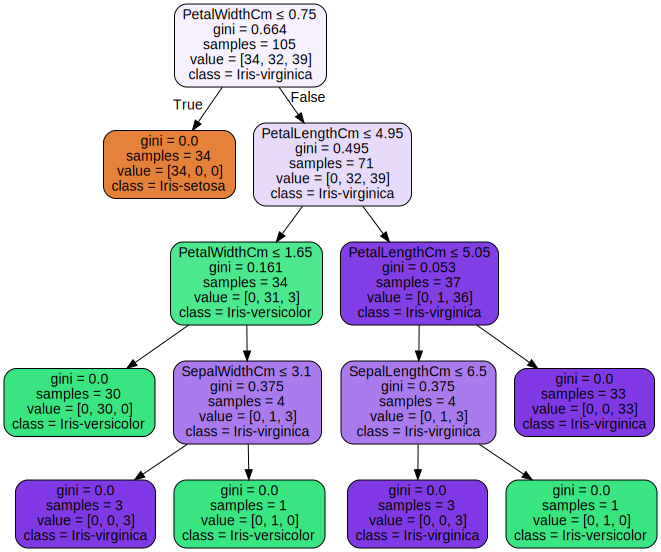

In [79]:
vis_data_1=tree.export_graphviz(DT1,out_file=None, feature_names=iris.drop(['Species'],axis=1).keys(),class_names=iris['Species'].unique(),filled=True,rounded=True,special_characters=True)
graphviz.Source(vis_data_1)

## KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
n_neigbours = [8,19,30,33,41,43,46,50,52,63]
accuracy_KNN_list = []
for i in  n_neigbours:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_KNN = knn.predict(X_test)
    accuracy_KNN = accuracy_score(y_test,predictions_KNN)*100
    accuracy_KNN_list.append(accuracy_KNN) 
print (accuracy_KNN_list)

[97.77777777777777, 97.77777777777777, 95.55555555555556, 95.55555555555556, 88.88888888888889, 91.11111111111111, 91.11111111111111, 91.11111111111111, 91.11111111111111, 86.66666666666667]


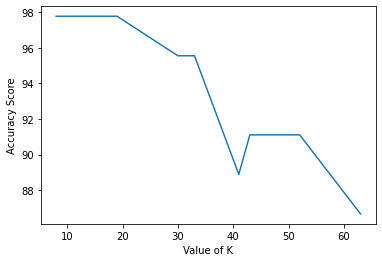

In [107]:
plt.plot( n_neigbours ,  accuracy_KNN_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy Score")
plt.show()

## Unsupervised Clustering -- K means

In [121]:
from sklearn.cluster import KMeans
clusters = [1,2,3,4,5,6,7,8,9]
for i in clusters:
    km=KMeans(n_clusters=i,random_state=2, algorithm="elkan")
    km.fit(X)
    values, counts = np.unique(km.labels_ , return_counts= True)
    print(counts)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[150]
[53 97]
[50 62 38]
[32 50 41 27]
[12 50 39 25 24]
[39 27 24 25 12 23]
[21 33 22 27 12 17 18]
[23 22  4 12 27 24 19 19]
[ 7 22 10 23 20 12 18 18 20]


In [124]:
centers=km.cluster_centers_
print(centers)

[[5.52857143 4.04285714 1.47142857 0.28571429]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.38       2.36       3.6        1.06      ]
 [5.12173913 3.5173913  1.53043478 0.27826087]
 [6.43       2.94       4.59       1.435     ]
 [7.475      3.125      6.3        2.05      ]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [5.61666667 2.78888889 4.16111111 1.32222222]
 [4.69       3.085      1.385      0.19      ]]


TypeError: only integer scalar arrays can be converted to a scalar index

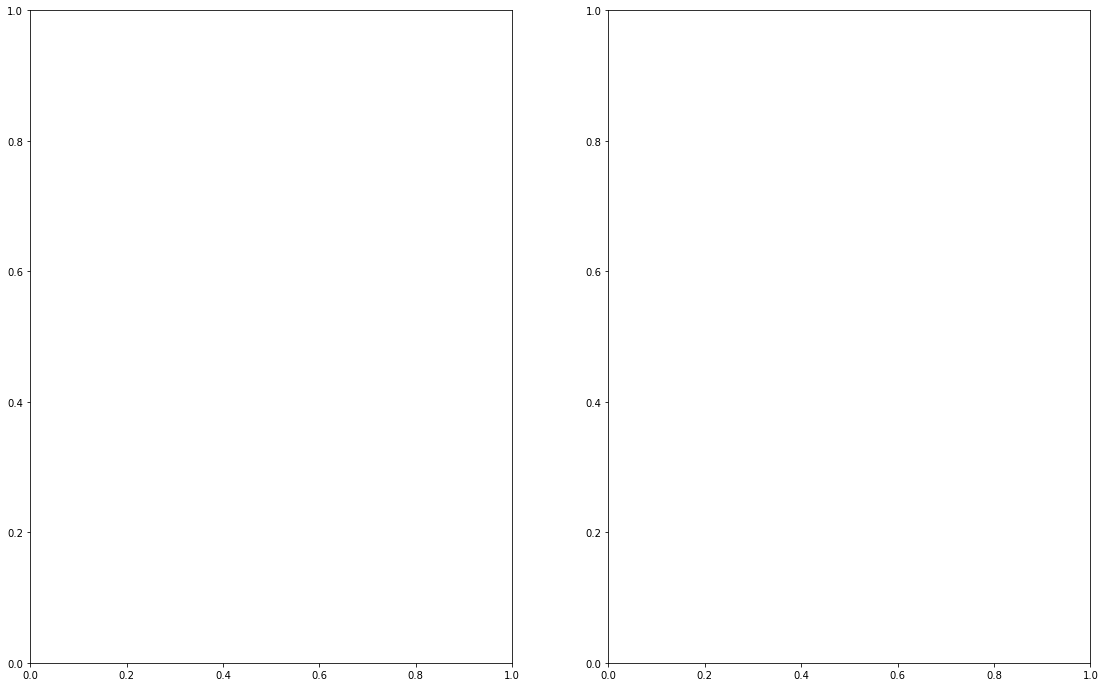

In [141]:
fig, axes = plt.subplots(1,2, figsize = (19,12))
colormap=np.array(['Red','green','blue']),
axes[0].scatter(iris['PetalLengthCm'],iris['PetalWidthCm'] , c=colormap[km.labels_],edgecolor='k',s=150)